In [1]:
import csv
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy import constants

In [2]:
# Open the CSV file and read the data
file = open('d1.txt', 'r')
reader = csv.reader(file)


In [3]:
# convert the data to list and then to numpy array
data = list(reader)
data = np.array(data, dtype=np.float64)

In [4]:
# seperate x and y variables
x, y = data[:, 0], data[:, 1]
n = x.size
# print(n)
# print(x[0],x[-1])

In [5]:
'''creating custom data set'''
# def samplef(x,a,b):
#     mean = 0
#     std_dev = 0.01
#     noise = 1e14*np.random.normal(mean, std_dev, size=x.shape) 
#     return (a/x**5)/((np.e**(b/x))-1)+noise
# x = np.linspace(1.0e-7,5e-06,1000)
# y = samplef(x,1.1303312191047457e-16,3.558695679613733e-06)

'creating custom data set'

In [6]:
'''Gaussian filter'''
# from scipy.ndimage import gaussian_filter1d
# y= gaussian_filter1d(y, 1.0)

'Gaussian filter'

In [7]:
'''Data slicing'''
# x = x[:n//2]
# y = y[:n//2]

'Data slicing'

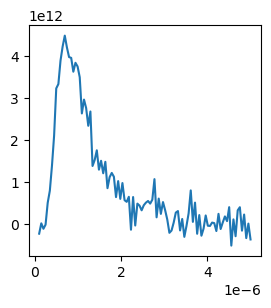

In [8]:
#plot the data
plt.figure(figsize=(3,3))
plt.plot(x,y)
plt.show()

Planck's equation for radiation
### $B = \frac{2hc^2}{l^5} \frac{1}{e^\frac{hc}{lkT}-1}$

In [9]:
# find index of maximum y, corresponding xmax and ymax
imax = np.argmax(y)
xmax = x[imax]
ymax = y[imax]
print(imax, xmax, ymax)

12 6.93939393939394e-07 4495219170310.889


In [10]:
#constants used in the equation
h = constants.h
c = constants.c
kb = constants.k
c = constants.c
wien = constants.Wien

Variable Bundling
### $B = \frac{a}{l^5} \frac{1}{e^\frac{b}{l}-1}$

#### $a = 2hc^2$
#### $b = \frac{hc}{k_bT}$

In [11]:
# define function to be curve fitted
def f(x,a,b):
    return (a/x**5)/((np.e**(b/x))-1)

In [12]:
# estimate temperature using wien's displacement law
T0= wien/xmax
print(T0)

4175.828581441048


In [13]:
# obtain initial guess of a and b using the maxima
b0 = 4.965*xmax
a0 = ymax*((np.e**(b0/xmax))-1)*(xmax**5)
print(a0,b0)

1.0294128327957507e-16 3.445409090909091e-06


In [14]:
# curve fit to obtain a, b and covariance matrix
popt, pcov = curve_fit(f,x,y,p0=[a0,b0])
(a,b) = popt
print(a,b) 

1.1591145823858313e-16 3.559680378987177e-06


In [15]:
# calculate the temperature from b and the constants
Tp = h*c/(kb*b)
print(Tp)

4041.8709668346787


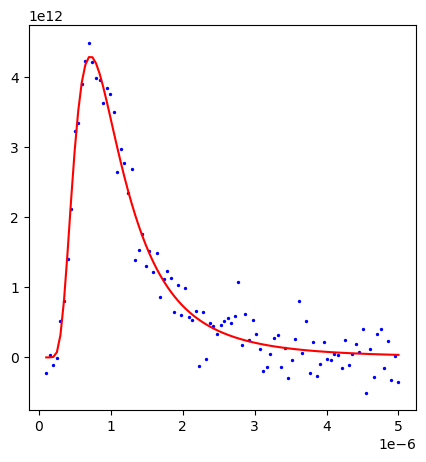

In [16]:
# Plot the fitted curve
plt.figure(figsize=(5,5))
plt.scatter(x,y,color='blue', label='Data Points',s=2)
plt.plot(x,f(x,a,b),color='red', label='fitted curve')
plt.show()

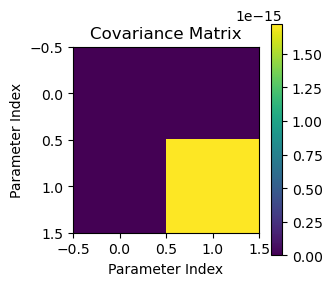

In [17]:
#plot the covariance matrix
plt.figure(figsize=(3,3))
plt.imshow(pcov, cmap='viridis', interpolation='none')
plt.colorbar()
plt.title('Covariance Matrix')
plt.xlabel('Parameter Index')
plt.ylabel('Parameter Index')
plt.show()

In [18]:
# calculate relative standard deviation of a and b
perr = np.sqrt(np.diag(pcov))
relative_std_dev = (perr/np.abs(popt))*100
print(relative_std_dev)

[5.50942359 1.16533187]


In [19]:
# calculate R-squared
y_fit = f(x,a,b)
ss_res = np.sum((y - y_fit) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print("R-squared:", r_squared)


R-squared: 0.9587700746123372


In [20]:
print('predicted a : ',a)
print('predicted b : ',b)
print('predicted temperature : ', Tp)
print('R-squared of the curve : ', r_squared*100)
print('relative standard deviation of a : ', relative_std_dev[0])
print('relative standard deviation of a : ', relative_std_dev[1])

predicted a :  1.1591145823858313e-16
predicted b :  3.559680378987177e-06
predicted temperature :  4041.8709668346787
R-squared of the curve :  95.87700746123372
relative standard deviation of a :  5.509423586883678
relative standard deviation of a :  1.1653318676673363


## Partial curve fitting (for b)

In [21]:
# Theoretically calculated value of a
ac = 2*h*(c**2)
print(ac)

1.1910429723971884e-16


In [22]:
# function with fixed a
def f1(x,b):
    a = ac
    return (a/x**5)/((np.e**(b/x))-1)

In [23]:
# perform curve fitting
popt, pcov1 = curve_fit(f1,x,y,p0=[b0])
(b1,) = popt

In [24]:
# calculate temperature
T1 = h*c/(kb*b1)
print(ac,b1,T1)

1.1910429723971884e-16 3.579230221944943e-06 4019.794168820207


In [25]:
perr = np.sqrt(np.diag(pcov1))
relative_std_dev = (perr/np.abs(popt))*100
print(perr,np.diag(pcov))
print(relative_std_dev,popt)

[1.27023648e-08] [4.07816757e-35 1.72076378e-15]
[0.35489097] [3.57923022e-06]


In [26]:
y_fit = f1(x,b1)
ss_res = np.sum((y - y_fit) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

In [27]:
# print other metrics
print(ac,b1,T1,r_squared*100,relative_std_dev)

1.1910429723971884e-16 3.579230221944943e-06 4019.794168820207 95.86673075101226 [0.35489097]


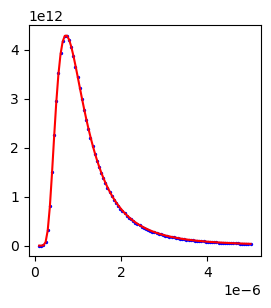

In [28]:
# graphs of original curve fit and partial curve fit
plt.figure(figsize=(3,3))
plt.scatter(x,f(x,a,b),color='blue', label='Original curve fit',s=2)
plt.plot(x,f1(x,b1),color='red', label='Partial curve fit')
plt.show()